In [1]:
#项目来源：https://www.heywhale.com/mw/project/649d143d2007f1338607bacd/content
import pandas as pd    
import numpy as np    
import matplotlib.pyplot as plt    
import seaborn as sns    
import datetime    
import warnings    
warnings.filterwarnings('ignore')

In [2]:
#读取数据
import pandas as pd
data_train = pd.read_csv('train.csv')    
data_test_a = pd.read_csv('testA.csv')
print('Train data shape:',data_train.shape)    
print('TestA data shape:',data_test_a.shape)

Train data shape: (800000, 47)
TestA data shape: (200000, 46)


In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  800000 non-null  int64  
 1   loanAmnt            800000 non-null  float64
 2   term                800000 non-null  int64  
 3   interestRate        800000 non-null  float64
 4   installment         800000 non-null  float64
 5   grade               800000 non-null  object 
 6   subGrade            800000 non-null  object 
 7   employmentTitle     799999 non-null  float64
 8   employmentLength    753201 non-null  object 
 9   homeOwnership       800000 non-null  int64  
 10  annualIncome        800000 non-null  float64
 11  verificationStatus  800000 non-null  int64  
 12  issueDate           800000 non-null  object 
 13  isDefault           800000 non-null  int64  
 14  purpose             800000 non-null  int64  
 15  postCode            799999 non-nul

In [4]:
data_train.describe()

,id,loanAmnt,term,interestRate,installment,employmentTitle,homeOwnership,annualIncome,verificationStatus,isDefault,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,799999.000000,800000.000000,8.000000e+05,800000.000000,800000.000000,...,759730.000000,759730.000000,759730.000000,759729.000000,759730.000000,766761.000000,730248.000000,759730.000000,759730.000000,759730.000000
mean,399999.500000,14416.818875,3.482745,13.238391,437.947723,72005.351714,0.614213,7.613391e+04,1.009683,0.199513,...,8.107937,8.575994,8.282953,14.622488,5.592345,11.643896,0.000815,0.003384,0.089366,2.178606
std,230940.252015,8716.086178,0.855832,4.765757,261.460393,106585.640204,0.675749,6.894751e+04,0.782716,0.399634,...,4.799210,7.400536,4.561689,8.124610,3.216184,5.484104,0.030075,0.062041,0.509069,1.844377
min,0.000000,500.000000,3.000000,5.310000,15.690000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,199999.750000,8000.000000,3.000000,9.750000,248.450000,427.000000,0.000000,4.560000e+04,0.000000,0.000000,...,5.000000,4.000000,5.000000,9.000000,3.000000,8.000000,0.000000,0.000000,0.000000,1.000000
50%,399999.500000,12000.000000,3.000000,12.740000,375.135000,7755.000000,1.000000,6.500000e+04,1.000000,0.000000,...,7.000000,7.000000,7.000000,13.000000,5.000000,11.000000,0.000000,0.000000,0.000000,2.000000
75%,599999.250000,20000.000000,3.000000,15.990000,580.710000,117663.500000,1.000000,9.000000e+04,2.000000,0.000000,...,11.000000,11.000000,10.000000,19.000000,7.000000,14.000000,0.000000,0.000000,0.000000,3.000000
max,799999.000000,40000.000000,5.000000,30.990000,1715.420000,378351.000000,5.000000,1.099920e+07,2.000000,1.000000,...,70.000000,132.000000,79.000000,128.000000,45.000000,82.000000,4.000000,4.000000,39.000000,30.000000


In [5]:
data_train.head(3).append(data_train.tail(3))

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,...,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,...,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,...,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
799997,799997,6000.0,3,13.33,203.12,C,C3,2582.0,10+ years,1,...,4.0,26.0,4.0,10.0,4.0,5.0,0.0,0.0,1.0,4.0
799998,799998,19200.0,3,6.92,592.14,A,A4,151.0,10+ years,0,...,10.0,6.0,12.0,22.0,8.0,16.0,0.0,0.0,0.0,5.0
799999,799999,9000.0,3,11.06,294.91,B,B3,13.0,5 years,0,...,3.0,4.0,4.0,8.0,3.0,7.0,0.0,0.0,0.0,2.0


In [6]:
print(f'There are {data_train.isnull().any().sum()} columns in train dataset with missing values.')

There are 22 columns in train dataset with missing values.


In [7]:
#进一步查看缺失特征中缺失率大于50%的特征
have_null_fea_dict = (data_train.isnull().sum()/len(data_train)).to_dict()    
fea_null_moreThanHalf = {}    
for key,value in have_null_fea_dict.items():    
    if value > 0.5:    
        fea_null_moreThanHalf[key] = value
fea_null_moreThanHalf

{}

<AxesSubplot:>

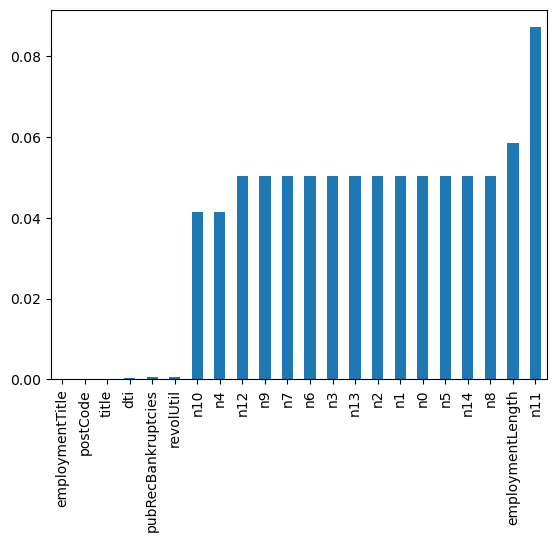

In [8]:
#缺失率可视化    
missing = data_train.isnull().sum()/len(data_train)    
missing = missing[missing > 0]    
missing.sort_values(inplace=True)    
missing.plot.bar()

In [9]:
#查看一值特征

In [10]:
one_value_fea = [col for col in data_train.columns if data_train[col].nunique() <= 1]
one_value_fea_test = [col for col in data_test_a.columns if data_test_a[col].nunique() <= 1]

In [11]:
one_value_fea, one_value_fea_test

(['policyCode'], ['policyCode'])

## 查看特征的数值类型有哪些，对象类型有哪些
- 特征一般都是由类别型特征和数值型特征组成，而数值型特征又分为连续型和离散型。
- 类别型特征有时具有非数值关系，有时也具有数值关系。比如‘grade’中的等级A，B，C等，是否只是单纯的分类，还是A优于其他要结合业务判断。
- 数值型特征本是可以直接入模的，但往往风控人员要对其做分箱，转化为WOE编码进而做标准评分卡等操作。从模型效果上来看，特征分箱主要是为了降低变量的复杂性，减少变量噪音对模型的影响，提高自变量和因变量的相关度。从而使模型更加稳定。

In [12]:
numerical_fea = list(data_train.select_dtypes(exclude=['object']).columns)  
category_fea = list(filter(lambda x: x not in numerical_fea,list(data_train.columns)))
numerical_fea.remove('id')

In [13]:
#划分数值型变量中的连续变量和离散型变量
#过滤数值型类别特征    
def get_numerical_serial_fea(data,feas, threshold=10):    
    numerical_serial_fea = []    
    numerical_noserial_fea = []    
    for fea in feas:    
        temp = data[fea].nunique()    
        if temp <= threshold:    
            numerical_noserial_fea.append(fea)    
            continue    
        numerical_serial_fea.append(fea)    
    return numerical_serial_fea,numerical_noserial_fea    
numerical_serial_fea,numerical_noserial_fea = get_numerical_serial_fea(data_train,numerical_fea)

In [14]:
#查看每个离散数值变量的分布
for value in numerical_noserial_fea:
    print(value, ':')
    print(data_train[value].value_counts())

term :
3    606902
5    193098
Name: term, dtype: int64
homeOwnership :
0    395732
1    317660
2     86309
3       185
5        81
4        33
Name: homeOwnership, dtype: int64
verificationStatus :
1    309810
2    248968
0    241222
Name: verificationStatus, dtype: int64
isDefault :
0    640390
1    159610
Name: isDefault, dtype: int64
initialListStatus :
0    466438
1    333562
Name: initialListStatus, dtype: int64
applicationType :
0    784586
1     15414
Name: applicationType, dtype: int64
policyCode :
1.0    800000
Name: policyCode, dtype: int64
n11 :
0.0    729682
1.0       540
2.0        24
4.0         1
3.0         1
Name: n11, dtype: int64
n12 :
0.0    757315
1.0      2281
2.0       115
3.0        16
4.0         3
Name: n12, dtype: int64


In [15]:
#可以看到policyCode无用，n11和n12分布差距悬殊

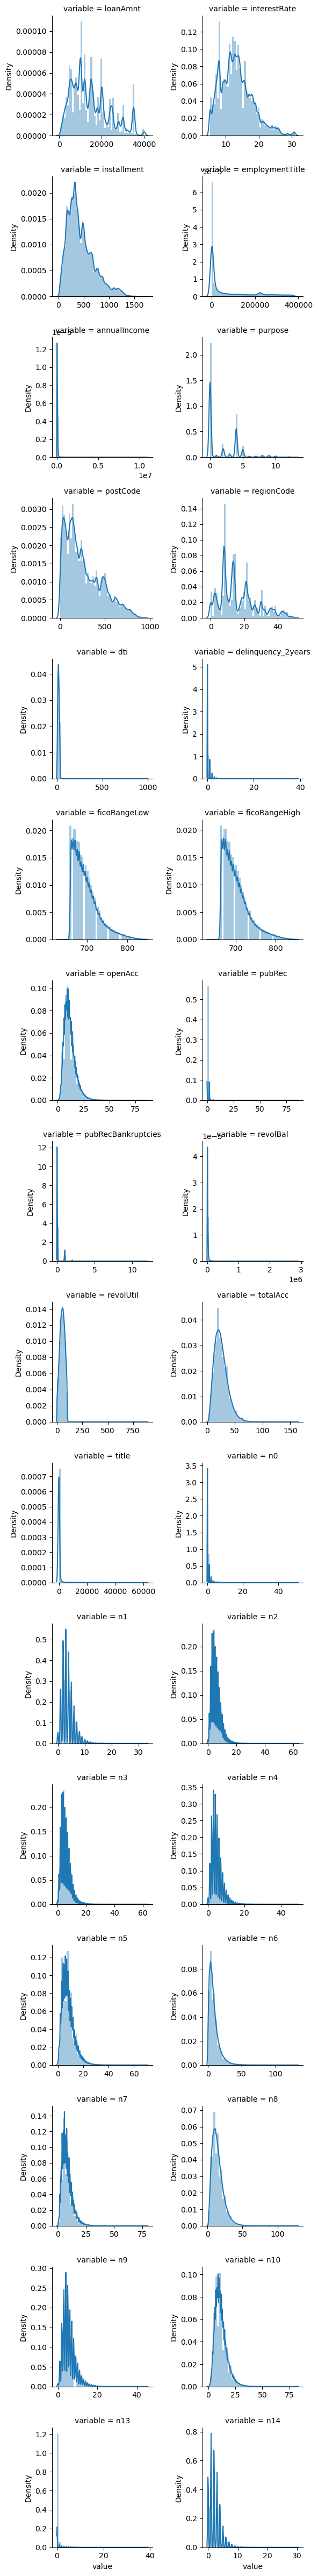

In [16]:
#查看数值性连续变量的分布
#pd.melt将多列转化成variable+value的两列形式
f = pd.melt(data_train, value_vars=numerical_serial_fea)    
#sns.FacetGrid根据variable进行分类
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)    
#g.map，将value设为横坐标
g = g.map(sns.distplot, "value")

In [18]:
#查看类别变量的分布
# category_fea.remove('id')
for var in category_fea:
    print(var,':')
    print(data_train[var].value_counts())

grade :
B    233690
C    227118
A    139661
D    119453
E     55661
F     19053
G      5364
Name: grade, dtype: int64
subGrade :
C1    50763
B4    49516
B5    48965
B3    48600
C2    47068
C3    44751
C4    44272
B2    44227
B1    42382
C5    40264
A5    38045
A4    30928
D1    30538
D2    26528
A1    25909
D3    23410
A3    22655
A2    22124
D4    21139
D5    17838
E1    14064
E2    12746
E3    10925
E4     9273
E5     8653
F1     5925
F2     4340
F3     3577
F4     2859
F5     2352
G1     1759
G2     1231
G3      978
G4      751
G5      645
Name: subGrade, dtype: int64
employmentLength :
10+ years    262753
2 years       72358
< 1 year      64237
3 years       64152
1 year        52489
5 years       50102
4 years       47985
6 years       37254
8 years       36192
7 years       35407
9 years       30272
Name: employmentLength, dtype: int64
issueDate :
2016-03-01    29066
2015-10-01    25525
2015-07-01    24496
2015-12-01    23245
2014-10-01    21461
              ...  
2007-08-01    

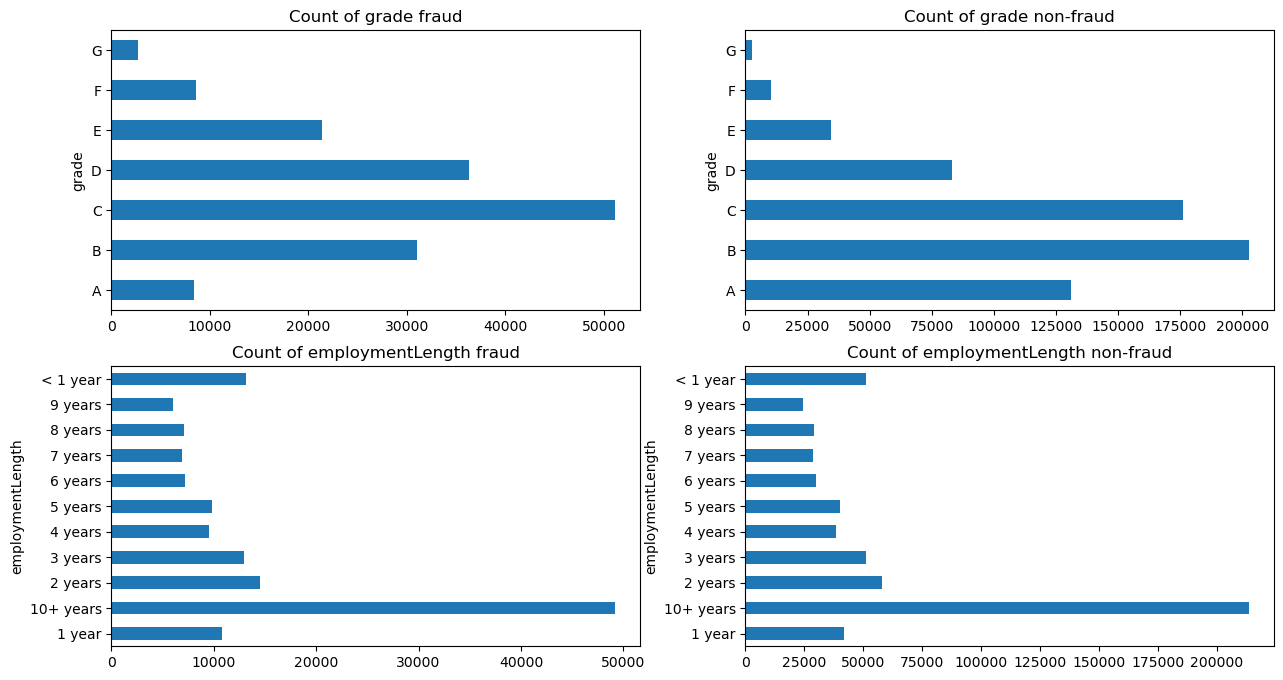

In [19]:
#首先查看类别型变量在不同y值上的分布
train_loan_fr = data_train.loc[data_train['isDefault'] == 1]    
train_loan_nofr = data_train.loc[data_train['isDefault'] == 0]
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 8))    
train_loan_fr.groupby('grade')['grade'].count().plot(kind='barh', ax=ax1, title='Count of grade fraud')    
train_loan_nofr.groupby('grade')['grade'].count().plot(kind='barh', ax=ax2, title='Count of grade non-fraud')    
train_loan_fr.groupby('employmentLength')['employmentLength'].count().plot(kind='barh', ax=ax3, title='Count of employmentLength fraud')    
train_loan_nofr.groupby('employmentLength')['employmentLength'].count().plot(kind='barh', ax=ax4, title='Count of employmentLength non-fraud')    
plt.show()

<AxesSubplot:title={'center':'Log Loan Amt - Not Fraud'}, ylabel='Frequency'>

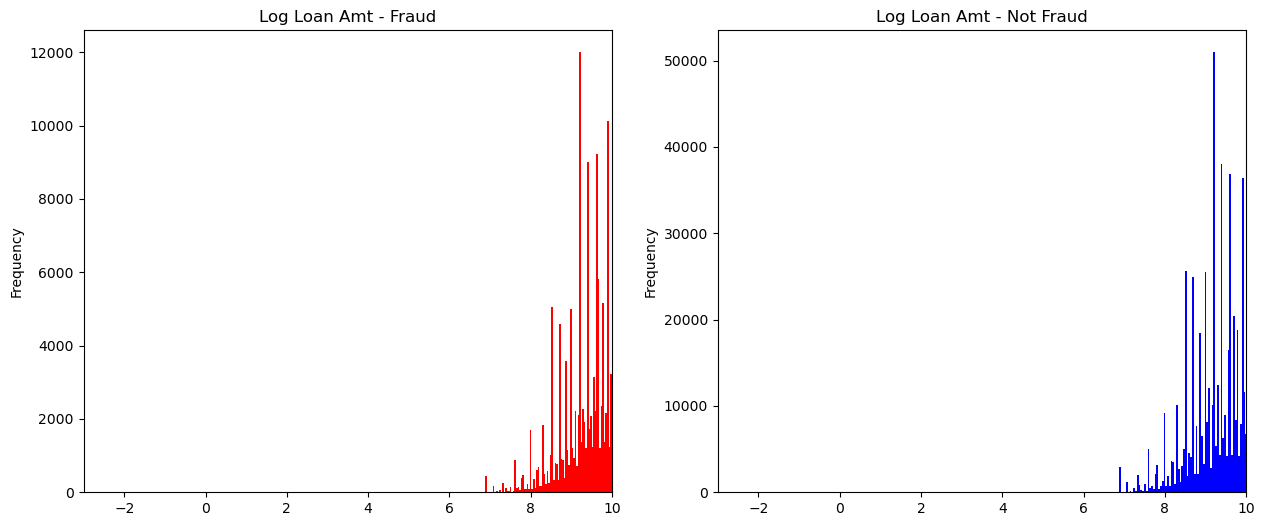

In [20]:
#其次查看连续型变量在不同y值上的分布
fig,((ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 6))    
(data_train.loc[data_train['isDefault'] == 1]['loanAmnt'].apply(np.log)   
    .plot(kind='hist',    
          bins=100,    
          title='Log Loan Amt - Fraud',    
          color='r',    
          xlim=(-3, 10),    
         ax= ax1) 
)
(data_train.loc[data_train['isDefault'] == 0]['loanAmnt'].apply(np.log)  
    .plot(kind='hist',    
          bins=100,    
          title='Log Loan Amt - Not Fraud',    
          color='b',    
          xlim=(-3, 10),    
         ax=ax2)
)

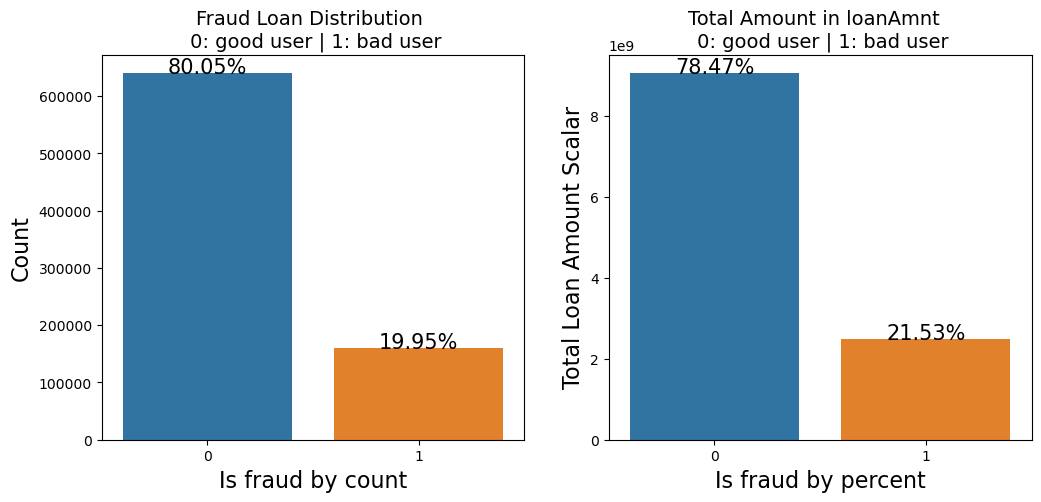

In [21]:
total = len(data_train)    
total_amt = data_train.groupby(['isDefault'])['loanAmnt'].sum().sum()    
plt.figure(figsize=(12,5))    
plt.subplot(121)##1代表行，2代表列，所以一共有2个图，1代表此时绘制第一个图。    
plot_tr = sns.countplot(x='isDefault',data=data_train)#data_train‘isDefault’这个特征每种类别的数量**    
plot_tr.set_title("Fraud Loan Distribution \n 0: good user | 1: bad user", fontsize=14)    
plot_tr.set_xlabel("Is fraud by count", fontsize=16)    
plot_tr.set_ylabel('Count', fontsize=16)    
for p in plot_tr.patches:    
    height = p.get_height()    
    plot_tr.text(p.get_x()+p.get_width()/2.,    
            height + 3,    
            '{:1.2f}%'.format(height/total*100),    
            ha="center", fontsize=15)    

percent_amt = (data_train.groupby(['isDefault'])['loanAmnt'].sum())    
percent_amt = percent_amt.reset_index()    
plt.subplot(122)    
plot_tr_2 = sns.barplot(x='isDefault', y='loanAmnt',  dodge=True, data=percent_amt)    
plot_tr_2.set_title("Total Amount in loanAmnt  \n 0: good user | 1: bad user", fontsize=14)    
plot_tr_2.set_xlabel("Is fraud by percent", fontsize=16)    
plot_tr_2.set_ylabel('Total Loan Amount Scalar', fontsize=16)    
for p in plot_tr_2.patches:    
    height = p.get_height()    
    plot_tr_2.text(p.get_x()+p.get_width()/2.,    
            height + 3,    
            '{:1.2f}%'.format(height/total_amt * 100),    
            ha="center", fontsize=15)

In [22]:
#时间格式数据处理
#转化成时间格式  issueDateDT特征表示数据日期离数据集中日期最早的日期（2007-06-01）的天数    
data_train['issueDate'] = pd.to_datetime(data_train['issueDate'],format='%Y-%m-%d')    
startdate = datetime.datetime.strptime('2007-06-01', '%Y-%m-%d')    
data_train['issueDateDT'] = data_train['issueDate'].apply(lambda x: x-startdate).dt.days

In [24]:
#转化成时间格式 test数据   
data_test_a['issueDate'] = pd.to_datetime(data_train['issueDate'],format='%Y-%m-%d')    
startdate = datetime.datetime.strptime('2007-06-01', '%Y-%m-%d')    
data_test_a['issueDateDT'] = data_test_a['issueDate'].apply(lambda x: x-startdate).dt.days

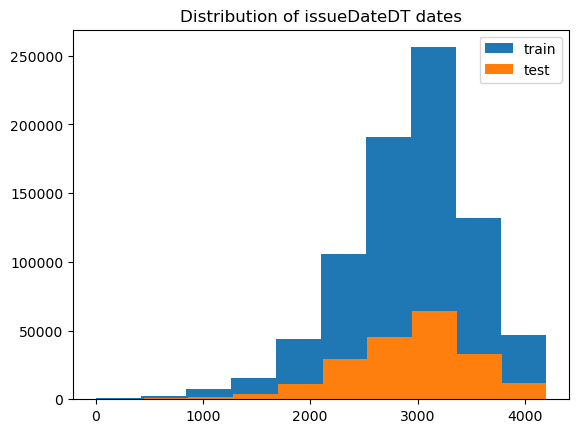

In [25]:
plt.hist(data_train['issueDateDT'], label='train');    
plt.hist(data_test_a['issueDateDT'], label='test');    
plt.legend();    
plt.title('Distribution of issueDateDT dates');    
#train 和 test issueDateDT 日期有重叠 所以使用基于时间的分割进行验证是不明智的

In [27]:
#透视图 索引可以有多个，“columns（列）”是可选的，聚合函数aggfunc最后是被应用到了变量“values”中你所列举的项目上。    
pivot = pd.pivot_table(data_train, index=['grade'], columns=['issueDateDT'], values=['loanAmnt'], aggfunc=np.sum)
pivot

loanAmnt                                                         \
issueDateDT     0        30       61       92       122      153       183    
grade                                                                         
A                NaN  53650.0  42000.0  19500.0  34425.0  63950.0   43500.0   
B                NaN  13000.0  24000.0  32125.0   7025.0  95750.0  164300.0   
C                NaN  68750.0   8175.0  10000.0  61800.0  52550.0  175375.0   
D                NaN      NaN   5500.0   2850.0  28625.0      NaN  167975.0   
E             7500.0      NaN  10000.0      NaN  17975.0   1500.0   94375.0   
F                NaN      NaN  31250.0   2125.0      NaN      NaN       NaN   
G                NaN      NaN      NaN      NaN      NaN      NaN       NaN   

                                           ...                          \
issueDateDT      214       245       274   ...        3926        3957   
grade                                      ...                           
A            168825.0   85600.0  101825.0  ...  13093850.0  11757325.0   
B            303175.0  434425.0  538450.0  ...  16863100.0  17275175.0   
C            151100.0  243725.0  393150.0  ...  17502375.0  17471500.0   
D            171325.0  192900.0  269325.0  ...  11403075.0  10964150.0   
E            116450.0   42000.0  139775.0  ...   3983050.0   3410125.0   
F             49000.0   27000.0   43000.0  ...   1074175.0    868925.0   
G             24625.0       NaN       NaN  ...     56100.0    243275.0   

                                                                       \
issueDateDT        3987        4018        4048       4079       4110   
grade                                                                   
A            11945975.0   9144000.0   7977650.0  6888900.0  5109800.0   
B            16217500.0  11431350.0   8967750.0  7572725.0  4884600.0   
C            16111225.0  11973675.0  10184450.0  7765000.0  5354450.0   
D            10747675.0   7082050.0   7189625.0  5195700.0  3455175.0   
E             3107150.0   2341825.0   2225675.0  1643675.0  1091025.0   
F              761675.0    685325.0    665750.0   685200.0   316700.0   
G              224825.0     64050.0    198575.0   245825.0    53125.0   

                                              
issueDateDT       4140       4171       4201  
grade                                         
A            3919275.0  2694025.0  2245625.0  
B            4329400.0  3922575.0  3257100.0  
C            4552600.0  2870050.0  2246250.0  
D            3038500.0  2452375.0  1771750.0  
E            1131625.0   883950.0   802425.0  
F             315075.0    72300.0        NaN  
G              23750.0    25100.0     1000.0  

[7 rows x 139 columns]

In [30]:
#用pandas_profiling生成数据报告
# !pip install pandas_profiling
import pandas_profiling
pfr = pandas_profiling.ProfileReport(data_train)    
pfr.to_file("./example.html")

Looking in indexes: https://mirrors.aliyun.com/pypi/simple/
     -------------------------------------- 324.4/324.4 kB 2.9 MB/s eta 0:00:00
     -------------------------------------- 353.0/353.0 kB 3.7 MB/s eta 0:00:00
     -------------------------------------- 102.7/102.7 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 663.5/663.5 kB 4.6 MB/s eta 0:00:00
     -------------------------------------- 296.5/296.5 kB 3.7 MB/s eta 0:00:00
     -------------------------------------- 153.3/153.3 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 4.7/4.7 MB 5.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=8acdf39eb4a44daa61f2cc798092f67cc1d2193f18dc67bb10511982c50d6c12
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\df\3b\8d\8cdd0b85dab6f5cb60ea23e61b84d8b28dd7f567d48052c4

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## 2.4 总结
数据探索性分析是我们初步了解数据，熟悉数据为特征工程做准备的阶段，甚至很多时候EDA阶段提取出来的特征可以直接当作规则来用。可见EDA的重要性，这个阶段的主要工作还是借助于各个简单的统计量来对数据整体的了解，分析各个类型变量相互之间的关系，以及用合适的图形可视化出来直观观察。希望本节内容能给初学者带来帮助，更期待各位学习者对其中的不足提出建议。

## 3.特征工程

In [33]:
import pandas as pd    
import numpy as np    
import matplotlib.pyplot as plt    
import seaborn as sns    
import datetime    
from tqdm import tqdm    
from sklearn.preprocessing import LabelEncoder    
from sklearn.feature_selection import SelectKBest    
from sklearn.feature_selection import chi2    
from sklearn.preprocessing import MinMaxScaler    
import xgboost as xgb    
import lightgbm as lgb    
from catboost import CatBoostRegressor    
import warnings    
from sklearn.model_selection import StratifiedKFold, KFold    
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, log_loss    
warnings.filterwarnings('ignore')

In [87]:
data_train =pd.read_csv('train.csv')    
data_test_a = pd.read_csv('testA.csv')

## 3.1 特征预处理
数据EDA部分我们已经对数据的大概和某些特征分布有了了解，数据预处理部分一般我们要处理一些EDA阶段分析出来的问题，这里介绍了数据缺失值的填充，时间格式特征的转化处理，某些对象类别特征的处理。

In [88]:
numerical_fea = list(data_train.select_dtypes(exclude=['object']).columns)    
category_fea = list(filter(lambda x: x not in numerical_fea,list(data_train.columns)))    
label = 'isDefault'    
numerical_fea.remove(label)

### 缺失值填充
- 把所有缺失值替换为指定的值0

data_train = data_train.fillna(0)

- 向用缺失值上面的值替换缺失值

data_train = data_train.fillna(axis=0,method='ffill')

- 纵向用缺失值下面的值替换缺失值,且设置最多只填充两个连续的缺失值

data_train = data_train.fillna(axis=0,method='bfill',limit=2)

In [38]:
#查看缺失值情况    
data_train.isnull().sum()

id                        0
loanAmnt                  0
term                      0
interestRate              0
installment               0
grade                     0
subGrade                  0
employmentTitle           1
employmentLength      46799
homeOwnership             0
annualIncome              0
verificationStatus        0
issueDate                 0
isDefault                 0
purpose                   0
postCode                  1
regionCode                0
dti                     239
delinquency_2years        0
ficoRangeLow              0
ficoRangeHigh             0
openAcc                   0
pubRec                    0
pubRecBankruptcies      405
revolBal                  0
revolUtil               531
totalAcc                  0
initialListStatus         0
applicationType           0
earliesCreditLine         0
title                     1
policyCode                0
n0                    40270
n1                    40270
n2                    40270
n3                  

In [89]:
#按照平均数填充数值型特征    
data_train[numerical_fea] = data_train[numerical_fea].fillna(data_train[numerical_fea].median())    
data_test_a[numerical_fea] = data_test_a[numerical_fea].fillna(data_train[numerical_fea].median())    
#按照众数填充类别型特征    
data_train[category_fea] = data_train[category_fea].fillna(data_train[category_fea].mode())    
data_test_a[category_fea] = data_test_a[category_fea].fillna(data_train[category_fea].mode())

In [44]:
data_train.isnull().sum()

id                        0
loanAmnt                  0
term                      0
interestRate              0
installment               0
grade                     0
subGrade                  0
employmentTitle           0
employmentLength      46799
homeOwnership             0
annualIncome              0
verificationStatus        0
issueDate                 0
isDefault                 0
purpose                   0
postCode                  0
regionCode                0
dti                       0
delinquency_2years        0
ficoRangeLow              0
ficoRangeHigh             0
openAcc                   0
pubRec                    0
pubRecBankruptcies        0
revolBal                  0
revolUtil                 0
totalAcc                  0
initialListStatus         0
applicationType           0
earliesCreditLine         0
title                     0
policyCode                0
n0                        0
n1                        0
n2                        0
n3                  

In [45]:
data_train['employmentLength'].value_counts(dropna=False).sort_index()

1 year        52489
10+ years    262753
2 years       72358
3 years       64152
4 years       47985
5 years       50102
6 years       37254
7 years       35407
8 years       36192
9 years       30272
< 1 year      64237
NaN           46799
Name: employmentLength, dtype: int64

In [90]:
def employmentLength_to_int(s):    
    if pd.isnull(s):    
        return s    
    else:    
        return np.int8(s.split()[0])    
for data in [data_train, data_test_a]:    
    data['employmentLength'].replace(to_replace='10+ years', value='10 years', inplace=True)    
    data['employmentLength'].replace('< 1 year', '0 years', inplace=True)    
    data['employmentLength'] = data['employmentLength'].apply(employmentLength_to_int)
data['employmentLength'].value_counts(dropna=False).sort_index()

0.0     15989
1.0     13182
2.0     18207
3.0     16011
4.0     11833
5.0     12543
6.0      9328
7.0      8823
8.0      8976
9.0      7594
10.0    65772
NaN     11742
Name: employmentLength, dtype: int64

In [91]:
#issueDate处理，转化成时间格式    
for data in [data_train, data_test_a]:    
    data['issueDate'] = pd.to_datetime(data['issueDate'],format='%Y-%m-%d')    
    startdate = datetime.datetime.strptime('2007-06-01', '%Y-%m-%d')    
    #构造时间特征    
    data['issueDateDT'] = data['issueDate'].apply(lambda x: x-startdate).dt.days

In [48]:
#对earliesCreditLine进行预处理
data_train['earliesCreditLine'].head(5)

0    Aug-2001
1    May-2002
2    May-2006
3    May-1999
4    Aug-1977
Name: earliesCreditLine, dtype: object

In [92]:
import calendar
for data in [data_train, data_test_a]:
    data['earliesCreditLine_mon'] = data['earliesCreditLine'].apply(lambda x: x.split('-')[0])
    data['earliesCreditLine'] = data['earliesCreditLine'].apply(lambda s: int(s[-4:]))

In [93]:
# 部分类别特征    
cate_features = ['grade', 'subGrade', 'employmentTitle', 'homeOwnership', 'verificationStatus', 'purpose', 'postCode', 'regionCode',     
                 'applicationType', 'initialListStatus', 'title', 'policyCode','earliesCreditLine_mon']    
for f in cate_features:    
    print(f, '类型数：', data[f].nunique())

grade 类型数： 7
subGrade 类型数： 35
employmentTitle 类型数： 79282
homeOwnership 类型数： 6
verificationStatus 类型数： 3
purpose 类型数： 14
postCode 类型数： 889
regionCode 类型数： 51
applicationType 类型数： 2
initialListStatus 类型数： 2
title 类型数： 12058
policyCode 类型数： 1
earliesCreditLine_mon 类型数： 12


In [94]:
#像等级这种类别特征，是有优先级的可以labelencode或者自映射
for data in [data_train, data_test_a]:    
    data['grade'] = data['grade'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7})

In [95]:
# 类型数在2之上，又不是高维稀疏的,且纯分类特征    
for data in [data_train, data_test_a]:    
    data = pd.get_dummies(data, columns=['subGrade', 'homeOwnership', 'verificationStatus', 'purpose', 'regionCode','earliesCreditLine_mon'], drop_first=True)

### 3.2 异常值处理
- 当你发现异常值后，一定要先分清是什么原因导致的异常值，然后再考虑如何处理。首先，如果这一异常值并不代表一种规律性的，而是极其偶然的现象，或者说你并不想研究这种偶然的现象，这时可以将其删除。其次，如果异常值存在且代表了一种真实存在的现象，那就不能随便删除。在现有的欺诈场景中很多时候欺诈数据本身相对于正常数据勒说就是异常的，我们要把这些异常点纳入，重新拟合模型，研究其规律。能用监督的用监督模型，不能用的还可以考虑用异常检测的算法来做。

- 注意test的数据不能删。

### 3.2.1 检测异常的方法一：均方差
在统计学中，如果一个数据分布近似正态，那么大约 68% 的数据值会在均值的一个标准差范围内，大约 95% 会在两个标准差范围内，大约 99.7% 会在三个标准差范围内。

In [63]:
def find_outliers_by_3segama(data,fea):    
    data_std = np.std(data[fea])    
    data_mean = np.mean(data[fea])    
    outliers_cut_off = data_std * 3    
    lower_rule = data_mean - outliers_cut_off    
    upper_rule = data_mean + outliers_cut_off    
    data[fea+'_outliers'] = data[fea].apply(lambda x:str('异常值') if x > upper_rule or x < lower_rule else '正常值')    
    return data

In [64]:
#得到特征的异常值后可以进一步分析变量异常值和目标变量的关系
data_train = data_train.copy()    
for fea in numerical_fea:    
    data_train = find_outliers_by_3segama(data_train,fea)    
    print(data_train[fea+'_outliers'].value_counts())    
    print(data_train.groupby(fea+'_outliers')['isDefault'].sum())    
    print('*'*10)

正常值    800000
Name: id_outliers, dtype: int64
id_outliers
正常值    159610
Name: isDefault, dtype: int64
**********
正常值    800000
Name: loanAmnt_outliers, dtype: int64
loanAmnt_outliers
正常值    159610
Name: isDefault, dtype: int64
**********
正常值    800000
Name: term_outliers, dtype: int64
term_outliers
正常值    159610
Name: isDefault, dtype: int64
**********
正常值    794259
异常值      5741
Name: interestRate_outliers, dtype: int64
interestRate_outliers
异常值      2916
正常值    156694
Name: isDefault, dtype: int64
**********
正常值    792046
异常值      7954
Name: installment_outliers, dtype: int64
installment_outliers
异常值      2152
正常值    157458
Name: isDefault, dtype: int64
**********
正常值    800000
Name: employmentTitle_outliers, dtype: int64
employmentTitle_outliers
正常值    159610
Name: isDefault, dtype: int64
**********
正常值    799701
异常值       299
Name: homeOwnership_outliers, dtype: int64
homeOwnership_outliers
异常值        62
正常值    159548
Name: isDefault, dtype: int64
**********
正常值    793973
异常值      

In [65]:
# 例如可以看到异常值在两个变量上的分布几乎复合整体的分布，如果异常值都属于为1的用户数据里面代表什么呢？
#删除异常值    
for fea in numerical_fea:    
    data_train = data_train[data_train[fea+'_outliers']=='正常值']    
    data_train = data_train.reset_index(drop=True)

### 3.2.1检测异常的方法二：箱型图
- 总结一句话：四分位数会将数据分为三个点和四个区间，IQR = Q3 -Q1，下触须=Q1 − 1.5x IQR，上触须=Q3 + 1.5x IQR；

### 3.3 数据分桶
- 特征分箱的目的：

    - 从模型效果上来看，特征分箱主要是为了降低变量的复杂性，减少变量噪音对模型的影响，提高自变量和因变量的相关度。从而使模型更加稳定。
- 数据分桶的对象：

    - 将连续变量离散化
    - 将多状态的离散变量合并成少状态
- 分箱的原因：

    - 数据的特征内的值跨度可能比较大，对有监督和无监督中如k-均值聚类它使用欧氏距离作为相似度函数来测量数据点之间的相似度。都会造成大吃小的影响，其中一种解决方法是对计数值进行区间量化即数据分桶也叫做数据分箱，然后使用量化后的结果。
- 分箱的优点：

- 处理缺失值：当数据源可能存在缺失值，此时可以把null单独作为一个分箱。
- 处理异常值：当数据中存在离群点时，可以把其通过分箱离散化处理，从而提高变量的鲁棒性（抗干扰能力）。例如，age若出现200这种异常值，可分入“age > 60”这个分箱里，排除影响。
- 业务解释性：我们习惯于线性判断变量的作用，当x越来越大，y就越来越大。但实际x与y之间经常存在着非线性关系，此时可经过WOE变换。
- 特别要注意一下分箱的基本原则：

- （1）最小分箱占比不低于5%
- （2）箱内不能全部是好客户
- （3）连续箱单调

1. 固定宽度分箱

当数值横跨多个数量级时，最好按照 10 的幂（或任何常数的幂）来进行分组：0\~9、10\~99、100\~999、1000\~9999，等等。固定宽度分箱非常容易计算，但如果计数值中有比较大的缺口，就会产生很多没有任何数据的空箱子。

In [66]:
#通过除法映射到间隔均匀的分箱中，每个分箱的取值范围都是loanAmnt/1000    
data['loanAmnt_bin1'] = np.floor_divide(data['loanAmnt'], 1000)
#通过对数函数映射到指数宽度分箱    
data['loanAmnt_bin2'] = np.floor(np.log10(data['loanAmnt']))
#分位数分箱
data['loanAmnt_bin3'] = pd.qcut(data['loanAmnt'], 10, labels=False)

### 3.4 特征交互

交互特征的构造非常简单，使用起来却代价不菲。如果线性模型中包含有交互特征对，那它的训练时间和评分时间就会从 O(n) 增加到 O(n2)，其中 n 是单一特征的数量。

In [69]:
for col in ['grade', 'subGrade']:    
    temp_dict = data_train.groupby([col])['isDefault'].agg(['mean']).reset_index().rename(columns={'mean': col + '_target_mean'})    
    temp_dict.index = temp_dict[col].values    
    temp_dict = temp_dict[col + '_target_mean'].to_dict()    

    data_train[col + '_target_mean'] = data_train[col].map(temp_dict)    
    data_test_a[col + '_target_mean'] = data_test_a[col].map(temp_dict)
    
# 其他衍生变量 mean 和 std    
for df in [data_train, data_test_a]:    
    for item in ['n0','n1','n2','n3','n4','n5','n6','n7','n8','n9','n10','n11','n12','n13','n14']:    
        df['grade_to_mean_' + item] = df['grade'] / df.groupby([item])['grade'].transform('mean')    
        df['grade_to_std_' + item] = df['grade'] / df.groupby([item])['grade'].transform('std')

## 3.5 特征编码
### 3.5.1labelEncode 直接放入树模型中

In [72]:
#label-encode:subGrade,postCode,title    
#高维类别特征需要进行转换    
for col in tqdm(['employmentTitle', 'postCode', 'title','subGrade']):    
    le = LabelEncoder()    
    le.fit(list(data_train[col].astype(str).values) + list(data_test_a[col].astype(str).values))    
    data_train[col] = le.transform(list(data_train[col].astype(str).values))    
    data_test_a[col] = le.transform(list(data_test_a[col].astype(str).values))    
print('Label Encoding 完成')

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:07<00:00,  1.76s/it]

Label Encoding 完成


### 3.5.2逻辑回归等模型要单独增加的特征工程
- 对特征做归一化，去除相关性高的特征
- 归一化目的是让训练过程更好更快的收敛，避免特征大吃小的问题
- 去除相关性是增加模型的可解释性，加快预测过程。

In [ ]:
# 举例归一化过程    
#伪代码    
for fea in [要归一化的特征列表]：    
    data[fea] = ((data[fea] - np.min(data[fea])) / (np.max(data[fea]) - np.min(data[fea])))

## 3.6 特征选择
- 特征选择技术可以精简掉无用的特征，以降低最终模型的复杂性，它的最终目的是得到一个简约模型，在不降低预测准确率或对预测准确率影响不大的情况下提高计算速度。特征选择不是为了减少训练时间（实际上，一些技术会增加总体训练时间），而是为了减少模型评分时间。
特征选择的方法：

- 1 Filter
    - 方差选择法
    - 相关系数法（pearson 相关系数）
    - 卡方检验
    - 互信息法
- 2 Wrapper （RFE）
    - 递归特征消除法
- 3 Embedded
    - 基于惩罚项的特征选择法
    - 基于树模型的特征选择

### 3.6.1Filter（方差选择法、相关系数法）
- 基于特征间的关系进行筛选

方差选择法

- 方差选择法中，先要计算各个特征的方差，然后根据设定的阈值，选择方差大于阈值的特征

In [73]:
from sklearn.feature_selection import VarianceThreshold    
#其中参数threshold为方差的阈值    
VarianceThreshold(threshold=3).fit_transform(train,target_train)

NameError: name 'train' is not defined

- 相关系数法

- Pearson 相关系数
    皮尔森相关系数是一种最简单的，可以帮助理解特征和响应变量之间关系的方法，该方法衡量的是变量之间的线性相关性。
    结果的取值区间为 [-1，1] ， -1 表示完全的负相关， +1表示完全的正相关，0 表示没有线性相关。

In [ ]:
from sklearn.feature_selection import SelectKBest    
from scipy.stats import pearsonr    
#选择K个最好的特征，返回选择特征后的数据    
#第一个参数为计算评估特征是否好的函数，该函数输入特征矩阵和目标向量，    
#输出二元组（评分，P值）的数组，数组第i项为第i个特征的评分和P值。在此定义为计算相关系数    
#参数k为选择的特征个数    

SelectKBest(k=5).fit_transform(train,target_train)

卡方检验

- 经典的卡方检验是用于检验自变量对因变量的相关性。 假设自变量有N种取值，因变量有M种取值，考虑自变量等于i且因变量等于j的样本频数的观察值与期望的差距。 其统计量如下： χ2=∑(A−T)2T，其中A为实际值，T为理论值

(注：卡方只能运用在正定矩阵上，否则会报错Input X must be non-negative)

In [ ]:
rom sklearn.feature_selection import SelectKBest    
from sklearn.feature_selection import chi2    
#参数k为选择的特征个数    

SelectKBest(chi2, k=5).fit_transform(train,target_train)

互信息法

- 经典的互信息也是评价自变量对因变量的相关性的。 在feature_selection库的SelectKBest类结合最大信息系数法可以用于选择特征，相关代码如下：

In [ ]:
from sklearn.feature_selection import SelectKBest    
from minepy import MINE    
#由于MINE的设计不是函数式的，定义mic方法将其为函数式的，    
#返回一个二元组，二元组的第2项设置成固定的P值0.5    
def mic(x, y):    
    m = MINE()    
    m.compute_score(x, y)    
    return (m.mic(), 0.5)    
#参数k为选择的特征个数    
SelectKBest(lambda X, Y: array(map(lambda x:mic(x, Y), X.T)).T, k=2).fit_transform(train,target_train)

### 3.6.2Wrapper （递归特征法）
- 递归特征消除法 递归消除特征法使用一个基模型来进行多轮训练，每轮训练后，消除若干权值系数的特征，再基于新的特征集进行下一轮训练。 在feature_selection库的RFE类可以用于选择特征，相关代码如下（以逻辑回归为例）：

In [ ]:
from sklearn.feature_selection import RFE    
from sklearn.linear_model import LogisticRegression    
#递归特征消除法，返回特征选择后的数据    
#参数estimator为基模型    
#参数n_features_to_select为选择的特征个数    

RFE(estimator=LogisticRegression(), n_features_to_select=2).fit_transform(train,target_train)

### 3.6.3Embedded（ 惩罚项的特征选择法、树模型的特征选择）
- 基于惩罚项的特征选择法 使用带惩罚项的基模型，除了筛选出特征外，同时也进行了降维。 在feature_selection库的SelectFromModel类结合逻辑回归模型可以用于选择特征，相关代码如下：

In [ ]:
from sklearn.feature_selection import SelectFromModel    
from sklearn.linear_model import LogisticRegression    
#带L1惩罚项的逻辑回归作为基模型的特征选择    

SelectFromModel(LogisticRegression(penalty="l1", C=0.1)).fit_transform(train,target_train)

- 基于树模型的特征选择 树模型中GBDT也可用来作为基模型进行特征选择。 在feature_selection库的SelectFromModel类结合GBDT模型可以用于选择特征，相关代码如下：

In [ ]:
from sklearn.feature_selection import SelectFromModel    
from sklearn.ensemble import GradientBoostingClassifier    
#GBDT作为基模型的特征选择    
SelectFromModel(GradientBoostingClassifier()).fit_transform(train,target_train)

本数据集中我们删除非入模特征后，并对缺失值填充，然后用计算协方差的方式看一下特征间相关性，然后进行模型训练

In [78]:
# 删除不需要的数据    
for data in [data_train, data_test_a]:    
    data.drop(['issueDate','id'], axis=1,inplace=True)
# "纵向用缺失值上面的值替换缺失值"    
data_train = data_train.fillna(axis=0,method='ffill')
x_train = data_train.drop(['isDefault','id'], axis=1)    
#计算协方差    
data_corr = x_train.corrwith(data_train.isDefault) #计算相关性    
result = pd.DataFrame(columns=['features', 'corr'])    
result['features'] = data_corr.index    
result['corr'] = data_corr.values

NameError: name 'x_train' is not defined

In [79]:
# 当然也可以直接看图    
data_numeric = data_train[numerical_fea]    
correlation = data_numeric.corr()    

f , ax = plt.subplots(figsize = (7, 7))    
plt.title('Correlation of Numeric Features with Price',y=1,size=16)    
sns.heatmap(correlation,square = True,  vmax=0.8)

KeyError: "['id'] not in index"

In [101]:
features = [f for f in data_train.columns if f not in ['id','issueDate','isDefault','earliesCreditLine_mon','subGrade'] and '_outliers' not in f]    
x_train = data_train[features]    
x_test = data_test_a[features]    
y_train = data_train['isDefault']

In [100]:
x_train['subGrade'].sample(5)

197892    D2
476311    B2
540101    A1
324631    C3
524061    C5
Name: subGrade, dtype: object

In [81]:
def cv_model(clf, train_x, train_y, test_x, clf_name):    
    folds = 5    
    seed = 2020    
    kf = KFold(n_splits=folds, shuffle=True, random_state=seed)    

    train = np.zeros(train_x.shape[0])    
    test = np.zeros(test_x.shape[0])    

    cv_scores = []    

    for i, (train_index, valid_index) in enumerate(kf.split(train_x, train_y)):    
        print('************************************ {} ************************************'.format(str(i+1)))    
        trn_x, trn_y, val_x, val_y = train_x.iloc[train_index], train_y[train_index], train_x.iloc[valid_index], train_y[valid_index]    

        if clf_name == "lgb":    
            train_matrix = clf.Dataset(trn_x, label=trn_y)    
            valid_matrix = clf.Dataset(val_x, label=val_y)    

            params = {    
                'boosting_type': 'gbdt',    
                'objective': 'binary',    
                'metric': 'auc',    
                'min_child_weight': 5,    
                'num_leaves': 2 ** 5,    
                'lambda_l2': 10,    
                'feature_fraction': 0.8,    
                'bagging_fraction': 0.8,    
                'bagging_freq': 4,    
                'learning_rate': 0.1,    
                'seed': 2020,    
                'nthread': 24,    
                'n_jobs':24,    
                'silent': True,    
                'verbose': -1,    
            }    

            model = clf.train(params, train_matrix, 50000, valid_sets=[train_matrix, valid_matrix], verbose_eval=200,early_stopping_rounds=200)    
            val_pred = model.predict(val_x, num_iteration=model.best_iteration)    
            test_pred = model.predict(test_x, num_iteration=model.best_iteration)    

            # print(list(sorted(zip(features, model.feature_importance("gain")), key=lambda x: x[1], reverse=True))[:20])    

        if clf_name == "xgb":    
            train_matrix = clf.DMatrix(trn_x , label=trn_y)    
            valid_matrix = clf.DMatrix(val_x , label=val_y)    

            params = {'booster': 'gbtree',    
                      'objective': 'binary:logistic',    
                      'eval_metric': 'auc',    
                      'gamma': 1,    
                      'min_child_weight': 1.5,    
                      'max_depth': 5,    
                      'lambda': 10,    
                      'subsample': 0.7,    
                      'colsample_bytree': 0.7,    
                      'colsample_bylevel': 0.7,    
                      'eta': 0.04,    
                      'tree_method': 'exact',    
                      'seed': 2020,    
                      'nthread': 36,    
                      "silent": True,    
                      }    

            watchlist = [(train_matrix, 'train'),(valid_matrix, 'eval')]    

            model = clf.train(params, train_matrix, num_boost_round=50000, evals=watchlist, verbose_eval=200, early_stopping_rounds=200)    
            val_pred  = model.predict(valid_matrix, ntree_limit=model.best_ntree_limit)    
            test_pred = model.predict(test_x , ntree_limit=model.best_ntree_limit)    

        if clf_name == "cat":    
            params = {'learning_rate': 0.05, 'depth': 5, 'l2_leaf_reg': 10, 'bootstrap_type': 'Bernoulli',    
                      'od_type': 'Iter', 'od_wait': 50, 'random_seed': 11, 'allow_writing_files': False}    

            model = clf(iterations=20000, **params)    
            model.fit(trn_x, trn_y, eval_set=(val_x, val_y),    
                      cat_features=[], use_best_model=True, verbose=500)    

            val_pred  = model.predict(val_x)    
            test_pred = model.predict(test_x)    

        train[valid_index] = val_pred    
        test = test_pred / kf.n_splits    
        cv_scores.append(roc_auc_score(val_y, val_pred))    

        print(cv_scores)    

    print("%s_scotrainre_list:" % clf_name, cv_scores)    
    print("%s_score_mean:" % clf_name, np.mean(cv_scores))    
    print("%s_score_std:" % clf_name, np.std(cv_scores))    
    return train, test

In [82]:
def lgb_model(x_train, y_train, x_test):    
    lgb_train, lgb_test = cv_model(lgb, x_train, y_train, x_test, "lgb")    
    return lgb_train, lgb_test    

def xgb_model(x_train, y_train, x_test):    
    xgb_train, xgb_test = cv_model(xgb, x_train, y_train, x_test, "xgb")    
    return xgb_train, xgb_test    

def cat_model(x_train, y_train, x_test):    
    cat_train, cat_test = cv_model(CatBoostRegressor, x_train, y_train, x_test, "cat")

In [102]:
lgb_train, lgb_test = lgb_model(x_train, y_train, x_test)

************************************ 1 ************************************
[LightGBM] [Warning] num_threads is set with nthread=28, will be overridden by n_jobs=24. Current value: num_threads=24
[LightGBM] [Warning] Unknown parameter: silent
Training until validation scores don't improve for 200 rounds
[200]	training's auc: 0.74742	valid_1's auc: 0.736005
[400]	training's auc: 0.759775	valid_1's auc: 0.736923
[600]	training's auc: 0.770189	valid_1's auc: 0.737173
[800]	training's auc: 0.779639	valid_1's auc: 0.737068
Early stopping, best iteration is:
[656]	training's auc: 0.772937	valid_1's auc: 0.737262
[0.7372618219078095]
************************************ 2 ************************************
[LightGBM] [Warning] num_threads is set with nthread=28, will be overridden by n_jobs=24. Current value: num_threads=24
[LightGBM] [Warning] Unknown parameter: silent
Training until validation scores don't improve for 200 rounds
[200]	training's auc: 0.748327	valid_1's auc: 0.732239
[400]

In [107]:
testA_result.to_pickle('testA_result.pickle')
roc_auc_score(lgb_test['isDefault'].values, lgb_test)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [123]:
lgb_test = pd.DataFrame([[data_test_a['id'][i], lgb_test[i]] for i in range(len(lgb_test))], columns=['id', 'isDefault'])
lgb_test.to_csv('lgb_test.csv', index=False)

In [115]:
x_test.columns

Index(['loanAmnt', 'term', 'interestRate', 'installment', 'grade',
       'employmentTitle', 'employmentLength', 'homeOwnership', 'annualIncome',
       'verificationStatus', 'purpose', 'postCode', 'regionCode', 'dti',
       'delinquency_2years', 'ficoRangeLow', 'ficoRangeHigh', 'openAcc',
       'pubRec', 'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc',
       'initialListStatus', 'applicationType', 'earliesCreditLine', 'title',
       'policyCode', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8',
       'n9', 'n10', 'n11', 'n12', 'n13', 'n14', 'issueDateDT'],
      dtype='object')